# Solving linear equation

A **system of linear equations** (or **linear system**) is a collection of one or more linear equations involving the same variables. For example:


$\begin{cases}
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$

is a system of two equations with two unknown variables $x_1$, $x_2$. **To solve** a system of linear equations means to find such values of the variables $x_1$, $x_2$, that all of its equations are simultaneously satisfied.

A linear system is **inconsistent** if it has no solution, and otherwise it is said to be **consistent**. Consistent system can have one or infinite number of solutions.

In [ ]:
import numpy as np
A=np.array([
    [-1,3],
    [3,2]
])
b=np.array([7,1])

In [ ]:
print(A)

[[-1  3]
 [ 3  2]]


In [ ]:
print(b)

[7 1]


In [ ]:
from numpy import linalg

In [ ]:
solution=linalg.solve(A,b)

In [ ]:
print(f"The solution is {solution}")

The solution is [-1.  2.]


In the **elimination method** you either add or subtract the equations of the linear system to get an equation with smaller number of variables. If needed, you can also multiply whole equation by non-zero number.

Take a look at the system $(1)$ again:

$\begin{cases}
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}$

In [ ]:
A_system=np.hstack((A,b.reshape(2,1)))

In [ ]:
print(A_system)

[[-1  3  7]
 [ 3  2  1]]


In [ ]:
A_system_copy=A_system.copy()

In [ ]:
A_system_copy[1]=A_system_copy[0]*3+A_system_copy[1]
A_system_copy[0]=A_system_copy[0]*(-1)
A_system_copy[1]=A_system_copy[1]/11


In [ ]:
print(A_system_copy)

[[ 1 -3 -7]
 [ 0  1  2]]


In [ ]:
# Graphical representation
import matplotlib.pyplot as plt
def plot_lines(M):

  fig,ax=plt.subplots(figsize=(10,10))
  x=np.linspace(-10,10,num=100)
  y1= (M[0,2] - M[0,0]*x)/M[0,1]
  y2= (M[1,2] - M[1,0]*x)/M[1,1]

  ax.plot(
      x,
      y1,
      label=f'y = {-M[0,0]/M[0,1]:.2f}x + {M[0,2]/M[0,1]:.2f}',
      color='green',
      linewidth=3
  )

  ax.plot(
      x,
      y2,
      label=f'y = {-M[1,0]/M[1,1]:.2f}x + {M[1,2]/M[1,1]:.2f}',
      color='pink',
      linewidth=3
  )

  A = M[:, 0:-1]
  b = M[:, -1::].flatten()
  d = np.linalg.det(A)

  if d !=0:
    solution=np.linalg.solve(A,b)
    ax.plot(
        solution[0],
        solution[1],
        marker='o',
        markersize=10,
        markeredgecolor='blue',
        markeredgewidth=2
    )
    ax.text(
        solution[0]-0.25,
        solution[1]+0.75,
        f'( {solution[0]}, {solution[1]})',
        fontsize=14
    )

  ax.set_xlabel('X Axis',size=14)
  ax.set_ylabel('Y Axis',size=14)
  ax.tick_params(axis='x', labelsize=14)
  ax.tick_params(axis='y', labelsize=14)
  plt.axis([-10, 10, -10, 10])
  ax.set_xticks(np.arange(-10,10))
  ax.set_yticks(np.arange(-10,10))
  ax.legend(loc='upper right')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.grid()

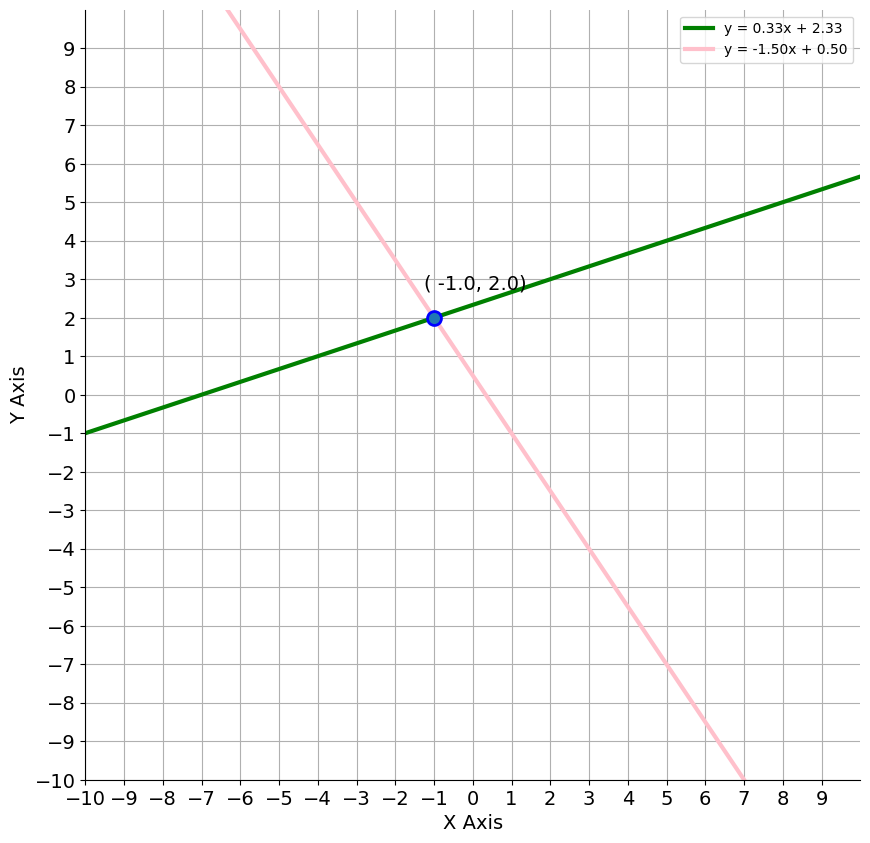

In [ ]:
plot_lines(A_system)

In [ ]:
A_system[:, 0:-1]

array([[-1,  3],
       [ 3,  2]])

In [ ]:
A_system[:,-1::].flatten()

array([7, 1])

Given another system of linear equations:

$\begin{cases}
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{5}$

let's find the determinant of the corresponding matrix.

In [ ]:
# this is a redundant system
# so this will be a singular matrix
B=np.array([
    [-1,3],
    [3,-9]
])
b=np.array([7,1])

In [ ]:
B_system=np.hstack((B,b.reshape(2,1)))
print(B_system)

[[-1  3  7]
 [ 3 -9  1]]


In [ ]:
# let's see this system solution
try:
  np.linalg.solve(B,b)
except np.linalg.LinAlgError as err:
  print(err)

Singular matrix


In [ ]:
# using Elimination method
B_system_copy=B_system.copy()

In [ ]:
B_system_copy[1] +=B_system_copy[0]*3
print(B_system_copy)

[[-1  3  7]
 [ 0  0 22]]


In [ ]:
# here 0 = 22 , so there will be no solution

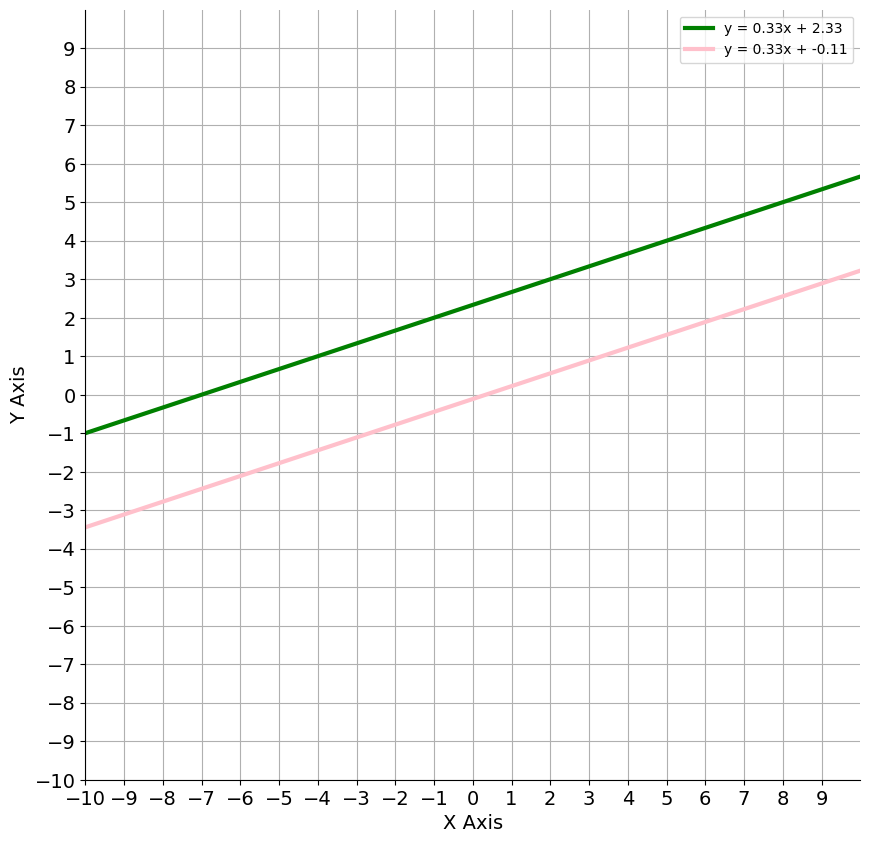

In [ ]:
# to visualize this graphically
plot_lines(B_system)

A system with infinite number of solutions
$(
-x_1+3x_2=7, \\ 3x_1-9x_2=-21,)$


In [ ]:
C=np.array([
    [-1,3],
    [3,-9]
])
c=np.array([7,-21])

In [ ]:
C_system=np.hstack((C,c.reshape(2,1)))
print(C_system)

[[ -1   3   7]
 [  3  -9 -21]]


In [ ]:
# this is a contradictory system
# augmented matrix will be non singular
try:
  np.linalg.solve(C,c)
except np.linalg.LinAlgError as err:
  print(err)

Singular matrix


In [ ]:
# using elimination method
C_system_copy = C_system.copy()


In [ ]:
C_system_copy[1] += 3*C_system_copy[0]
print(C_system_copy)

[[-1  3  7]
 [ 0  0  0]]


In [ ]:
# here number of variable 2 , but number of non-zero equation 1 . so we need to take 1 free variable here . and there would
# be infinite solution

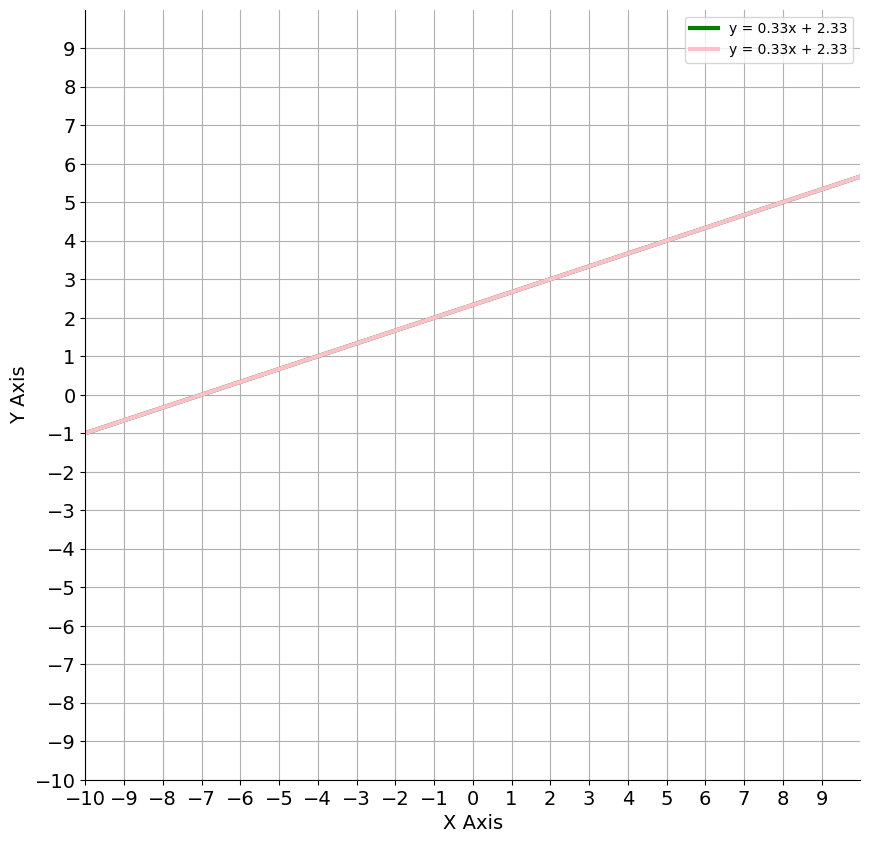

In [ ]:
# to see this visually
plot_lines(C_system)

Here is a **system of linear equations** (or **linear system**) with three equations and three unknown variables:


$$\begin{cases}
4x_1-3x_2+x_3=-10, \\ 2x_1+x_2+3x_3=0, \\ -x_1+2x_2-5x_3=17, \end{cases}\tag{1}$$

**To solve** this system of linear equations means to find such values of the variables $x_1$, $x_2$, $x_3$, that all of its equations are simultaneously satisfied.

In [ ]:
A = np.array([
        [4, -3, 1],
        [2, 1, 3],
        [-1, 2, -5]
    ], dtype=np.dtype(float))

b = np.array([-10, 0, 17], dtype=np.float64)

In [ ]:
print(f'solution of this system {linalg.solve(A,b)}')

solution of this system [ 1.  4. -2.]


In [ ]:
# using row reduction
A_system = np.hstack((A, b.reshape((3, 1))))

Let's review **elementary operations**, which do not change the solution set of a linear system:

- Multiply any row by a non-zero number
- Add two rows and exchange one of the original rows with the result of the addition
- Swap rows

In [ ]:
def MultiplyRow(M, row_num, row_num_multiple):
    M_new = M.copy()
    M_new[row_num] = M_new[row_num] * row_num_multiple
    return M_new

In [ ]:
def AddRows(M, row_num_1, row_num_2, row_num_1_multiple):
    M_new = M.copy()
    M_new[row_num_2] = row_num_1_multiple * M_new[row_num_1] + M_new[row_num_2]
    return M_new

In [ ]:
def SwapRows(M, row_num_1, row_num_2):
    M_new = M.copy()
    M_new[[row_num_1, row_num_2]] = M_new[[row_num_2, row_num_1]]
    return M_new

In [ ]:
A_ref = SwapRows(A_system,0,2)
A_ref = AddRows(A_ref,0,1,2)
A_ref = AddRows(A_ref,0,2,4)
A_ref = AddRows(A_ref,1,2,-1)
A_ref = MultiplyRow(A_ref,2,-1/12)

In [ ]:
x_3 = -2
x_2 = (A_ref[1,3] - A_ref[1,2] * x_3) / A_ref[1,1]
x_1 = (A_ref[0,3] - A_ref[0,2] * x_3 - A_ref[0,1] * x_2) / A_ref[0,0]

print(x_1, x_2, x_3)

1.0 4.0 -2


# Linear Transformations

A **transformation** is a function from one vector space to another that respects the underlying (linear) structure of each vector space. Referring to a specific transformation, you can use a symbol, such as $T$. Specifying the spaces containing the input and output vectors, e.g. $\mathbb{R}^2$ and $\mathbb{R}^3$, you can write $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Transforming vector $v \in \mathbb{R}^2$ into the vector $w\in\mathbb{R}^3$ by the transformation $T$, you can use the notation $T(v)=w$ and read it as "*T of v equals to w*" or "*vector w is an **image** of vector v with the transformation T*".

The following Python function corresponds to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ with the following symbolic formula:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1, \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1, \\
           0,\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [ ]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]

    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


In the given example, you are demonstrating that the transformation $T$ is linear by verifying the two properties of linearity for any scalar $k$ and input vectors $u$ and $v$. Let's go through the verification for each property:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

\begin{align*}
T(kv) &= \begin{bmatrix} 3kv_1 \\ 0 \\ -2kv_2 \end{bmatrix} \\
kT(v) &= k\begin{bmatrix} 3v_1 \\ 0 \\ -2v_2 \end{bmatrix} = \begin{bmatrix} 3kv_1 \\ 0 \\ -2kv_2 \end{bmatrix}
\end{align*}

\begin{align*}
T(u + v) &= \begin{bmatrix} 3(u_1 + v_1) \\ 0 \\ -2(u_2 + v_2) \end{bmatrix} \\
T(u) + T(v) &= \begin{bmatrix} 3u_1 \\ 0 \\ -2u_2 \end{bmatrix} + \begin{bmatrix} 3v_1 \\ 0 \\ -2v_2 \end{bmatrix} = \begin{bmatrix} 3(u_1 + v_1) \\ 0 \\ -2(u_2 + v_2) \end{bmatrix}
\end{align*}

  

In [ ]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n T(u)+T(v):\n", T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 
 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


**Transformations defined as a matrix multiplication**

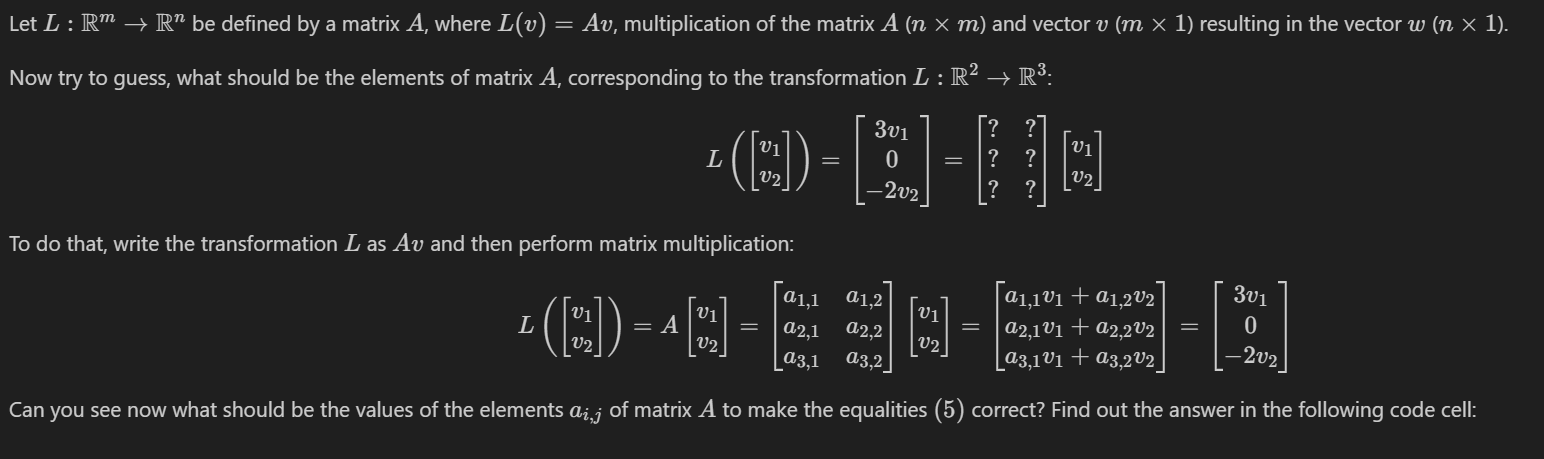

In [ ]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v

    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


**Standard transformations in a plane**

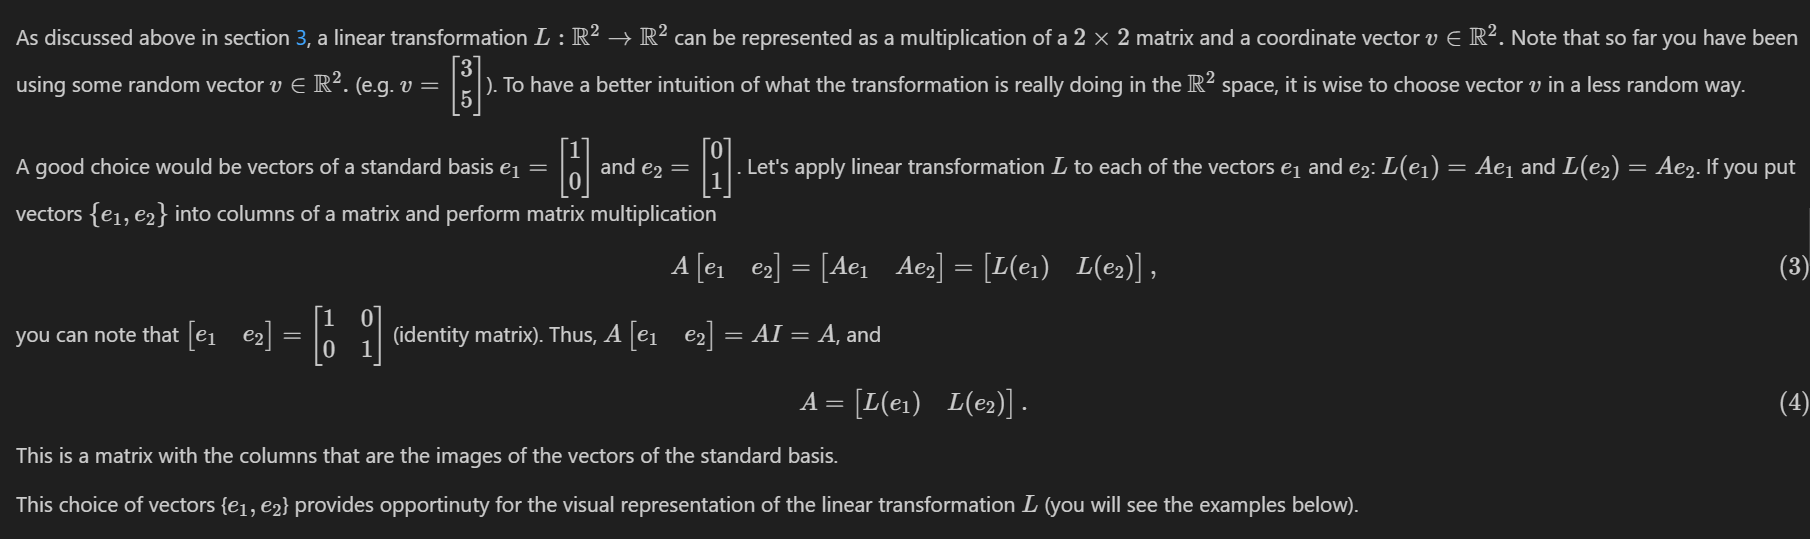

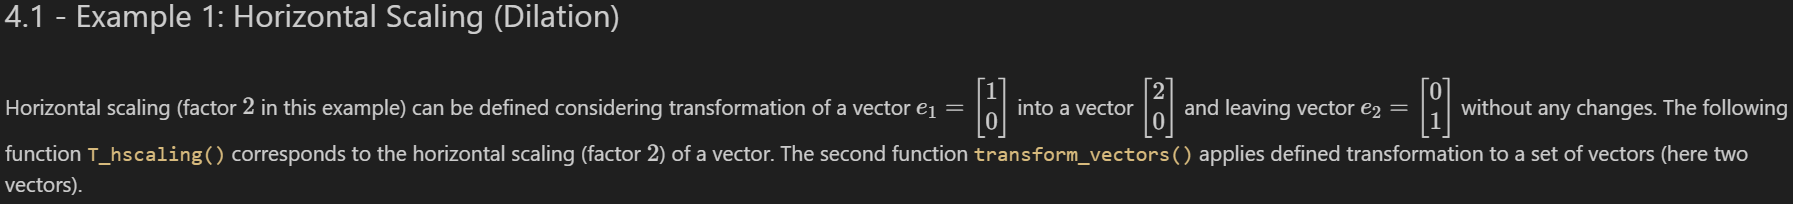

In [ ]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v

    return w


def transform_vectors(T, v1, v2):
    V = np.hstack((v1.reshape(2,1), v2.reshape(2,1)))
    W = T(V)

    return W

e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2,
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


**Reflection about y axis**

In [ ]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v

    return w

e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2,
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


# Eigenvalues and exercise

<a name='1'></a>
**1 - Eigenvalues and Eigenvectors: Definition and Interpretation**

<a name='1.1'></a>
**1.1 - Definition of Eigenvalues and Eigenvectors**

Let's consider a linear transformation defined by matrix $A=\begin{bmatrix}2 & 3 \\ 2 & 1 \end{bmatrix}$. Apply this transformation to the standard basis vectors $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ and visualize the result (this was covered in details in the previous labs of this Course):

In [ ]:
A = np.array([[2, 3],[2, 1]])
e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])

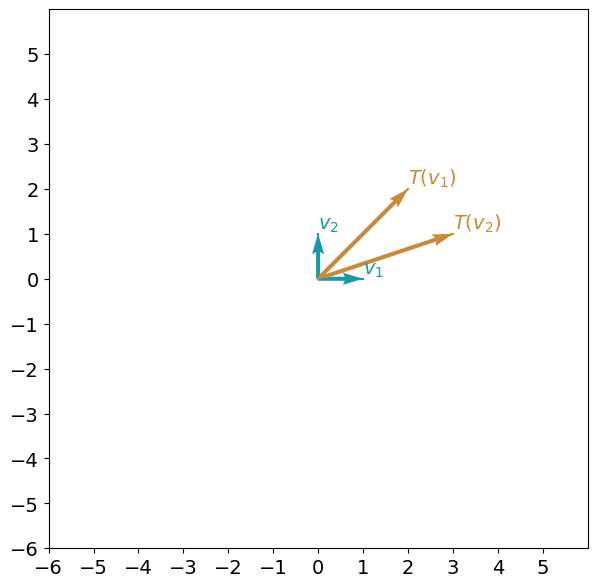

In [ ]:

def plot_transformation(T, v1, v2):
    # Define colors
    color_original = "#129cab"
    color_transformed = "#cc8933"

    # Create a new figure
    fig, ax = plt.subplots(figsize=(7, 7))

    # Set axis properties
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

    # Plot the original vectors
    ax.quiver(0, 0, v1[0], v1[1], color=color_original, angles='xy', scale_units='xy', scale=1)
    ax.quiver(0, 0, v2[0], v2[1], color=color_original, angles='xy', scale_units='xy', scale=1)

    # Plot lines for original vectors
    ax.plot([0, v1[0]], [0, v1[1]], color=color_original)
    ax.plot([0, v2[0]], [0, v2[1]], color=color_original)

    # Label the original vectors
    ax.text(v1[0], v1[1], f'$v_1$', fontsize=14, color=color_original, va='bottom')
    ax.text(v2[0], v2[1], f'$v_2$', fontsize=14, color=color_original, va='bottom')

    # Transform the vectors
    v1_transformed = T @ v1
    v2_transformed = T @ v2

    # Plot the transformed vectors
    ax.quiver(0, 0, v1_transformed[0], v1_transformed[1], color=color_transformed, angles='xy', scale_units='xy', scale=1)
    ax.quiver(0, 0, v2_transformed[0], v2_transformed[1], color=color_transformed, angles='xy', scale_units='xy', scale=1)

    # Plot lines for transformed vectors
    ax.plot([0, v1_transformed[0]], [0, v1_transformed[1]], color=color_transformed)
    ax.plot([0, v2_transformed[0]], [0, v2_transformed[1]], color=color_transformed)

    # Label the transformed vectors
    ax.text(v1_transformed[0], v1_transformed[1], f'$T(v_1)$', fontsize=14, color=color_transformed, va='bottom')
    ax.text(v2_transformed[0], v2_transformed[1], f'$T(v_2)$', fontsize=14, color=color_transformed, va='bottom')

    # Set aspect ratio to be equal
    ax.set_aspect("equal")

    # Show the plot
    plt.show()

# Call the function with your transformation matrix A and vectors e1 and e2
plot_transformation(A, e1, e2)


Both of the original basis vectors $e_1$ and $e_2$ (shown as $v_1$ and $v_2$ on the plot) changed their length and direction with the transformation $A$. What if you can choose some other basis vectors, where only their length will change? For the vector $v$, its transformation will be $Av=\lambda v$. Vector $v$ will be called **eigenvector** and scaling factor $\lambda$ will be called **eigenvalue**.

Note, that if $v$ is an eigenvector, so that $Av = \lambda v$, then any vector $kv$ ($k\in\mathbb{R}, k\neq 0$) is also an eigenvector with the same eigenvalue: $A(kv)=k(Av)=k \lambda v = \lambda (kv)$. Geometrically, in $\mathbb{R}^2$ this means that there are infinitely many eigenvectors corresponding to one eigenvalue, they are on the same straight line. And usually just one can be chosen as an eigenvector.

In [ ]:
A_eig = np.linalg.eig(A)

print("Matrix A:\n", A, "\n\n Eigenvalues and eigenvectors of matrix A:\n", A_eig)

Matrix A:
 [[2 3]
 [2 1]] 

 Eigenvalues and eigenvectors of matrix A:
 (array([ 4., -1.]), array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


In [ ]:
eigenvalues,eigenvectors=linalg.eig(A)

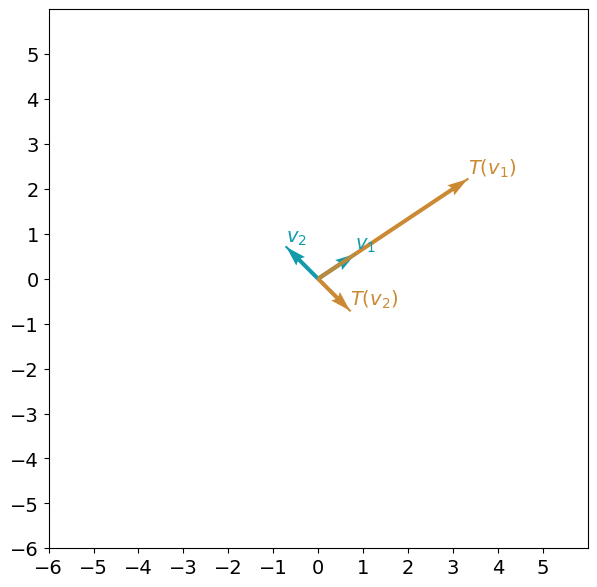

In [ ]:
plot_transformation(A, eigenvectors[:,0],eigenvectors[:,1])

You can see that now that this linear transformation can be interpreted as a stretch in the direction of the eigenvector $v_1$ and change of the direction for the vector $v_2$.

**Exercise 1:**

Complete matrix `A_reflection_yaxis`, which corresponds to the reflection about y-axis, and find its eigenvalues and eigenvectors. Visualize the result and investigate it. How would you interpret this linear transformation in terms of the eigenvectors and thier eigenvalues?

Matrix A_reflection_yaxis:
 [[-1  0]
 [ 0  1]] 

 Eigenvalues and eigenvectors of matrix A_reflection_yaxis:
 (array([-1.,  1.]), array([[1., 0.],
       [0., 1.]]))


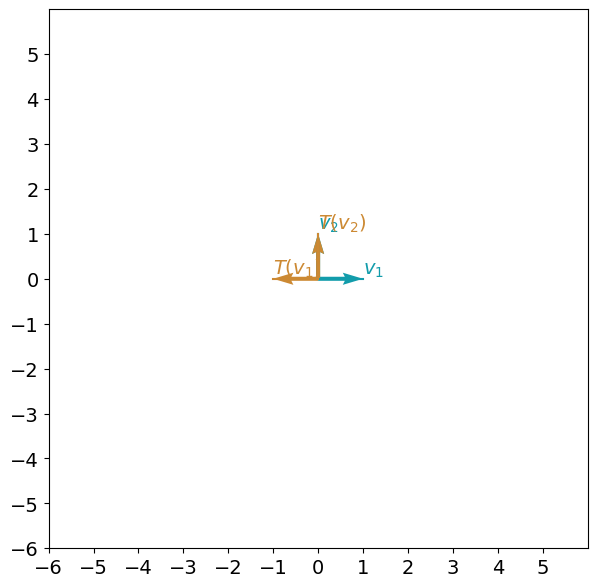

In [ ]:
A_reflection_yaxis = np.array([[-1,0],[0,1]])
A_reflection_yaxis_eig = np.linalg.eig(A_reflection_yaxis)
print("Matrix A_reflection_yaxis:\n", A_reflection_yaxis,
      "\n\n Eigenvalues and eigenvectors of matrix A_reflection_yaxis:\n", A_reflection_yaxis_eig)
plot_transformation(A_reflection_yaxis, A_reflection_yaxis_eig[1][:,0], A_reflection_yaxis_eig[1][:,1])

A shear matrix, specifically an "x-shear matrix," is a type of linear transformation matrix used in linear algebra and computer graphics to perform a shear operation along the x-axis (horizontal shear). It skews or distorts objects in the horizontal direction while leaving the vertical direction unchanged.
\begin{align*}
Sx= \begin{bmatrix} 1 & k\\ 0 & 1 \end{bmatrix}\end{align*}

**Exercise 2:**

Complete matrix `A_shear_x`, which corresponds to the shear in x-direction with a scalar $0.5$.
Find eigenvalues and eigenvectors of matrix `A_shear_x`. Visualize the transformation applied to the found eigenvectors.

Matrix A_shear_x:
 [[1.  0.5]
 [0.  1. ]] 

 Eigenvalues and eigenvectors of matrix A_shear_x:
 (array([1., 1.]), array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]]))


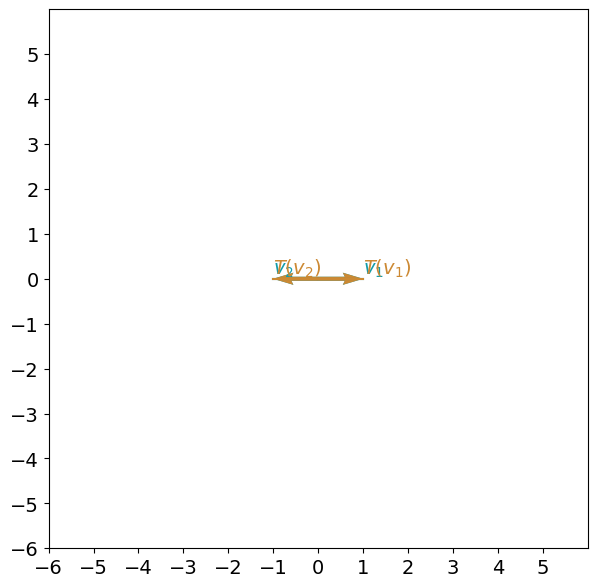

In [ ]:
A_shear_x = np.array([[1,0.5],[0,1]])
A_shear_x_eig = np.linalg.eig(A_shear_x)
print("Matrix A_shear_x:\n", A_shear_x,
      "\n\n Eigenvalues and eigenvectors of matrix A_shear_x:\n", A_shear_x_eig)
plot_transformation(A_shear_x, A_shear_x_eig[1][:,0], A_shear_x_eig[1][:,1])

There are two eigenvalues $\lambda  =1$, that are equal to each other. Thus, shear transformation has only one eigenvector. Here there is no change in the x-direction, and any other vector outside of the $Ox$ line will be sheared, so they cannot be eigenvectors. This is an example of $2 \times 2$ matrix with only one eigenvector.

**Exercise 3:**


Rotation by $90$ degrees clockwise can be defined by matrix $A_{rotation}=\begin{bmatrix}0 & 1 \\ -1 & 0 \end{bmatrix}$. Find its eigenvalues and eigenvectors:

In [ ]:
A_rotation = np.array([[0, 1],[-1, 0]])
A_rotation_eig = np.linalg.eig(A_rotation)

print("Matrix A_rotation:\n", A_rotation,
      "\n\n Eigenvalues and eigenvectors of matrix A_rotation:\n", A_rotation_eig)

Matrix A_rotation:
 [[ 0  1]
 [-1  0]] 

 Eigenvalues and eigenvectors of matrix A_rotation:
 (array([0.+1.j, 0.-1.j]), array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]))


There are two eigenvalues in the output, but they are actually complex numbers. So, there are no *real* eigenvalues ($\lambda\notin\mathbb{R}$), which means there will be no vectors that will keep their direction with this transformation. This makes sense for the rotation 90 degress

**Exercise 5:**
Now you can investigate some other examples. What if you take identity matrix? This means that there will be no change to any vector in the plane - all of the vectors can be considered as eigenvectors.

In [ ]:
A_identity=np.eye(2)
A_identity_eig = np.linalg.eig(A_identity)

print("Matrix A_identity:\n", A_identity,
      "\n\n Eigenvalues and eigenvectors of matrix A_identity:\n", A_identity_eig)

Matrix A_identity:
 [[1. 0.]
 [0. 1.]] 

 Eigenvalues and eigenvectors of matrix A_identity:
 (array([1., 1.]), array([[1., 0.],
       [0., 1.]]))


The out of the `np.linalg.eig()` function shows that there are two eigenvalues that are equal to each other $\lambda = 1$, which is true. But the list of eigenvectors does not cover all of them. It can be show algebraically that all of the vectors will be eigenvectors for identity matrix. Using software, you can't see it sometimes - be careful! That's why understanding of mathematical objects behind your codes and models is so important.

Check that the same will happen finding eigenvectors for the scaling (dilation) in both directions x and y by factor $2$:

In [ ]:
A_scaling = np.eye(2)*2
A_scaling_eig = np.linalg.eig(A_scaling)

print("Matrix A_scaling:\n", A_scaling,
      "\n\n Eigenvalues and eigenvectors of matrix A_scaling:\n", A_scaling_eig)

Matrix A_scaling:
 [[2. 0.]
 [0. 2.]] 

 Eigenvalues and eigenvectors of matrix A_scaling:
 (array([2., 2.]), array([[1., 0.],
       [0., 1.]]))


**Exercise 6:**
You can investigate some more interesting examples, e.g. projection onto x-axis $A_{projection}=\begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}$ has two real eigenvalues, and one of them is equal to $0$. There is nothing wrong with it, $\lambda$ can be equal to $0$! The transformation still has two eigenvectors.

In [ ]:
A_projection = np.array([[1, 0],[0, 0]])
A_projection_eig = np.linalg.eig(A_projection)

print("Matrix A_projection:\n", A_projection,
      "\n\n Eigenvalues and eigenvectors of matrix A_projection:\n", A_projection_eig)

Matrix A_projection:
 [[1 0]
 [0 0]] 

 Eigenvalues and eigenvectors of matrix A_projection:
 (array([1., 0.]), array([[1., 0.],
       [0., 1.]]))


**Exercise 7:**

In [ ]:
# application of eignevectors and eigenvalues : navigating webpages

Multiple components describing some structure can be organized as a single vector. If the state of the structure is changing in time due to some process, the vector is referred as a **state vector**. Such dynamic processes are often modeled at discrete times calculating the state vector as a linear transformation of a previous state vector. This model is called a **discrete dynamical system**.

Starting with an initial state $X_0$, the transition to the next state $X_1$ is a linear transformation defined with a matrix $P$: $X_1=PX_0$. That leads to $X_2=PX_1=P^2X_0$, $X_3=P^3X_0$, and so on. This implies that $X_t=PX_{t-1}$ for $t=0,1,2,3,\ldots$.

A discrete dynamical system can be used to model browsing web pages. Web pages often contain links to other pages, for simplicity assume that the browser is only following links to a new page rather than navigating to an unlinked one.

Let the probabilities that the browser is on a particular page at time $t$ be a state vector $X_t$. Navigation from one page to another advances the model from one state vector $X_{t-1}$ to another state vector $X_t$. A linear transformation, defined by a matrix $P$, will have entries $a_{ij}$ with the probabilities that the browser navigates to page $i$ from page $j$. For fixed column $j$, the entries represent a probability distribution describing location of the browser at the next step. Thus, the entries in each column must add to one.

Set matrix $P$ for a small number of pages $n=5$. All elements on the main diagonal should be equal to $0$, and the entries in each column must add to one. Here is an example of such a matrix for $n=4$:

$$P=
\begin{bmatrix}
0 & 0.75 & 0.35 & 0.85 \\
0.15 & 0 & 0.35 & 0.05 \\
0.30 & 0.20 & 0 & 0.1 \\
0.55 & 0.05 & 0.30 & 0
\end{bmatrix}\tag{5}
$$

Define vector $X_0$, so the browser starts navigation at page $4$ ($X_0$ is a vector with a single entry equal to one, and all other entries equal to zero). Apply the transformation once: $X_1=PX_0$ to find a vector of the probabilities that the browser is at each of five pages.

In [ ]:
P = np.array([
    [0, 0.25, 0.25, 0.25, 0.25],
    [0.25, 0, 0.25, 0.25, 0.25],
    [0.25, 0.25, 0, 0.25, 0.25],
    [0.25, 0.25, 0.25, 0, 0.25],
    [0.25, 0.25, 0.25, 0.25, 0]
])
X0 = np.array([[0], [0], [0], [1], [0]])
X1 = P @ X0
print(sum(P))

[1. 1. 1. 1. 1.]


Applying the transformation $m$ times you can find a vector $X_m$ with the probabilities of the browser being at each of the pages after $m$ steps of navigation.

In [ ]:
X = np.array([[0],[0],[0],[1],[0]])
m = 20

for t in range(m):
    X = P @ X

print(X)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


It is interesting to predict the probabilities in $X_m$ when $m$ is large, and thus determining what pages a browser are more likely to visit after this sort of random navigation. To do that you have to apply the transformation many times, and in real life problems this will be computationally expensive. Eigenvalues and eigenvectos can help here significantly reducing the amount of calculations.

In [ ]:
np.linalg.eig(P)

(array([-0.25,  1.  , -0.25, -0.25, -0.25]),
 array([[-0.89442719,  0.4472136 ,  0.19518001,  0.15432036,  0.09319422],
        [ 0.2236068 ,  0.4472136 , -0.53674504,  0.73302172, -0.25628411],
        [ 0.2236068 ,  0.4472136 ,  0.76445506,  0.04715344, -0.25628411],
        [ 0.2236068 ,  0.4472136 , -0.21144502, -0.46724776, -0.41160781],
        [ 0.2236068 ,  0.4472136 , -0.21144502, -0.46724776,  0.8309818 ]]))

A square matrix is called a **Markov matrix** if all entries are nonnegative and the sum of each column elements is equal to $1$. Markov matrices have a handy property - they always have an eigenvalue equals to 1.

Matrix $P$ was defined in such a way, that it is actually a Markov matrix, and you can see that it has an eigenvalue $1$. The equation $X_m=PX_{m-1}$ can be rewritten as $PX_{m-1}=1\times X_m$. Predicting probabilities in $X_m$ when $m$ is large you can actually look for an eigenvector corresponding to the eigenvalue $1$, because then you will get $PX = X$.

In [ ]:
X_inf = np.linalg.eig(P)[1][:,0]

print("Eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))

Eigenvector corresponding to the eigenvalue 1:
[-0.89442719  0.2236068   0.2236068   0.2236068   0.2236068 ]


**Exercise 6:**

Perform matrix multiplication $PX$ (multiply matrix `P` and vector `X_inf`) to check that the result will be equal to the vector $X$ (`X_inf`).

In [ ]:

def check_eigenvector(P, X_inf):
    X_check = P @ X_inf
    return X_check

X_check = check_eigenvector(P, X_inf)

print("Original eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))
print("Result of multiplication:" + str(X_check))

# Function np.isclose compares two NumPy arrays element by element, allowing for error tolerance (rtol parameter).
print("Check that PX=X element by element:" +str(np.isclose(X_inf, X_check, rtol=1e-10)))

Original eigenvector corresponding to the eigenvalue 1:
[-0.89442719  0.2236068   0.2236068   0.2236068   0.2236068 ]
Result of multiplication:[ 0.2236068 -0.0559017 -0.0559017 -0.0559017 -0.0559017]
Check that PX=X element by element:[False False False False False]


The output eigenvectors of the `np.linalg.eig()` function are normalized so that their norm is $1$. For the vector $X$ you would like to choose a vector in the same direction, so that the sum of its elements is equal to $1$:

In [ ]:
X_inf = X_inf / sum(X_inf)

print("Probabilities being at each of the pages:\n" + str(X_inf))

Probabilities being at each of the pages:
[ 1.61125679e+16 -4.02814196e+15 -4.02814196e+15 -4.02814196e+15
 -4.02814196e+15]


You can see the probabilities of the browser being at each of the pages after infinite steps of navigation. Such type of a model was the foundation of the PageRank algorithm, which is the basis of Google's very successful search engine.